## Hypothesis Testing Procedure

1. **State the Hypotheses**
   - **Null Hypothesis ( $H_0$ )**: Statement of no effect or no difference.
   - **Alternative Hypothesis ( $H_a$ or $H_1$ )**: What the researcher aims to prove.

2. **Choose the Level of Significance ( $\alpha$ )**
   - The probability of rejecting the null hypothesis when it is true. Common choices for $\alpha$ are 0.05, 0.01, and 0.10.

3. **Select the Appropriate Test Statistic**
   - This is based on the nature of the data and the hypothesis (e.g., t-test, z-test, chi-square test).

4. **Determine the Distribution of the Test Statistic under the Null Hypothesis**
   - Typically a t-distribution, z-distribution, or another appropriate distribution.

5. **Locate the Critical Region**
   - Based on the level of significance and the chosen test statistic, determine the region (or regions) in the distribution where, if the test statistic falls, you would reject the null hypothesis.

6. **Compute the Test Statistic**
   - Analyze the sample data to calculate the value of the test statistic.

7. **Make a Decision**
   - **Critical Value Approach**: Compare the computed test statistic to the critical value (or values). If the statistic falls in the critical region, reject the null hypothesis.
   - **P-value Approach**: Determine the p-value, which is the probability of observing a test statistic in the SDMS curve as extreme as, or more extreme than, the computed value under the null hypothesis. If the p-value is less than or equal to $\alpha$, reject the null hypothesis.

8. **State the Conclusion**
   - Either reject the null hypothesis in favor of the alternative, or 
   - Fail to reject the null hypothesis, indicating there's insufficient evidence to support the alternative.

9. **Interpret the Result**
   - Discuss the implications of your decision in the context of the original research question or problem.


#### Failure to reject the null hypothesis
If there is not enough evidence, the researcher fails to reject the null hypothesis.
Note that the researcher does not conclude that there is no treatment effect, simply
that there is not enough evidence to conclude that there is an effect.

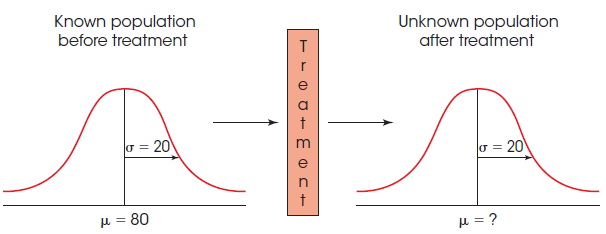

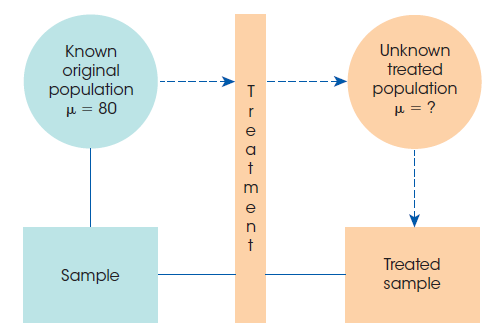

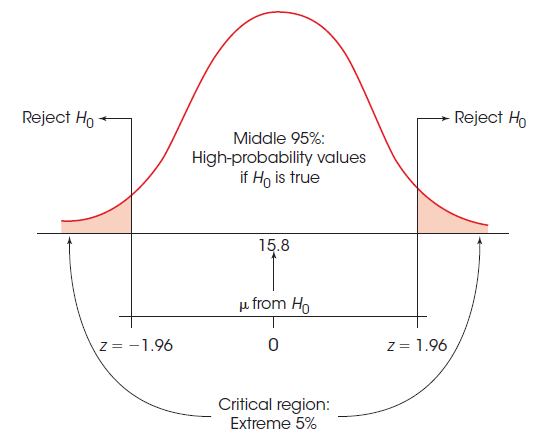

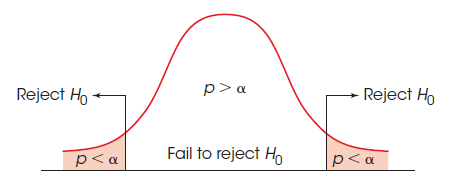

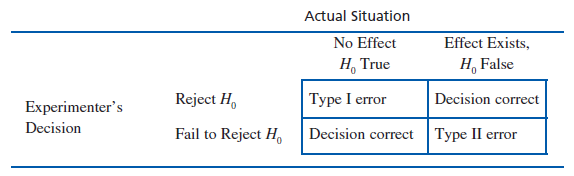!

## Problem:

Researchers examine the effect of caffeine on response time in a driving simulator. 30 minutes after participants consumed one 6-ounce cup of coffee, their reaction time was measured using a driving simulation task. The distribution of reaction times for this task is known to be normal with:
- $ \mu = 400 $ msec (Population mean)
- $ \sigma = 40 $ msec (Population standard deviation)

From a sample of $ n = 36 $ participants, they obtained a sample mean of $ M = 392 $ msec. Test whether caffeine has a significant effect on reaction time using a two-tailed test with $ \alpha = 0.05 $.

### Solution:

**Idea:** To check whether our sample is a common or a rare sample in the original population. <br> 

Our assumption is that the effect of a treatment would be exactly the same for every datapoint in our distribution. That means that the treatment could cause a shift in the mean of the population distribution (to the left of to the right) but it wouldn't change the variability (std) or shape of the curve (Gaussian). The same can be said about the SDMS (sampling distribution of sample means). So, we draw a sample and we check whether this sample would be a common or a rare sample in the original SDMS. If it is a common sample, we say that we don't have enough evidence to say that the treatment had any effect. However, if it is a rare sample, there are 2 possibilities: the treatment had no effect and we indeed got a rare sample (low probability); or we had an effect, meaning that we have a new population distribution and our sample belongs to that population. By convention, we choose the latter. <br> <br> 
To find whether our sample is common or rare, we find the probability of drawing samples with means exactly or bigger than our sample mean. To do that, we divide the tail beyond our sample mean by all the possibilities. To facilitate our calculations, we normalize our SDMS to the Z-distribution and then get the already calculated probability from there. 

#### 1. State the Hypotheses:
- **Null Hypothesis ($ H_0 $):** Caffeine does not have an effect on reaction time, i.e., $ \mu = 400 $ msec.
- **Alternative Hypothesis ($ H_a $):** Caffeine has a significant effect on reaction time, i.e., $ \mu \neq 400 $ msec.

#### 2. Choose the Level of Significance:
- $ \alpha = 0.05 $

#### 3. Select the Test Statistic:
Given that the population standard deviation is known and the sample size is sufficiently large, we will use the z-test. The formula for the z-test statistic is:
$$ z = \frac{M - \mu}{\sigma / \sqrt{n}} $$

#### 4. Determine the Critical Value and Locate the Critical Region:
For a two-tailed test with $ \alpha = 0.05 $, the z-distribution critical values are:
- $ z_{\text{critical, left}} = -1.96 $
- $ z_{\text{critical, right}} = 1.96 $

#### 5. Compute the Test Statistic:
Using the given data:
$$ z = \frac{392 - 400}{40 / \sqrt{36}} $$
$$ z = \frac{-8}{40/6} $$
$$ z = \frac{-8}{6.67} $$
$$ z \approx -1.20 $$

#### 6. Make a Decision:
Comparing the computed z-value with the critical values:
Since -1.96 < -1.20 < 1.96, our computed z-value does not lie in the critical region. Therefore, we fail to reject the null hypothesis.

### Conclusion:
There isn't enough evidence at the 0.05 significance level to conclude that caffeine has a significant effect on reaction time.

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.lines import Line2D

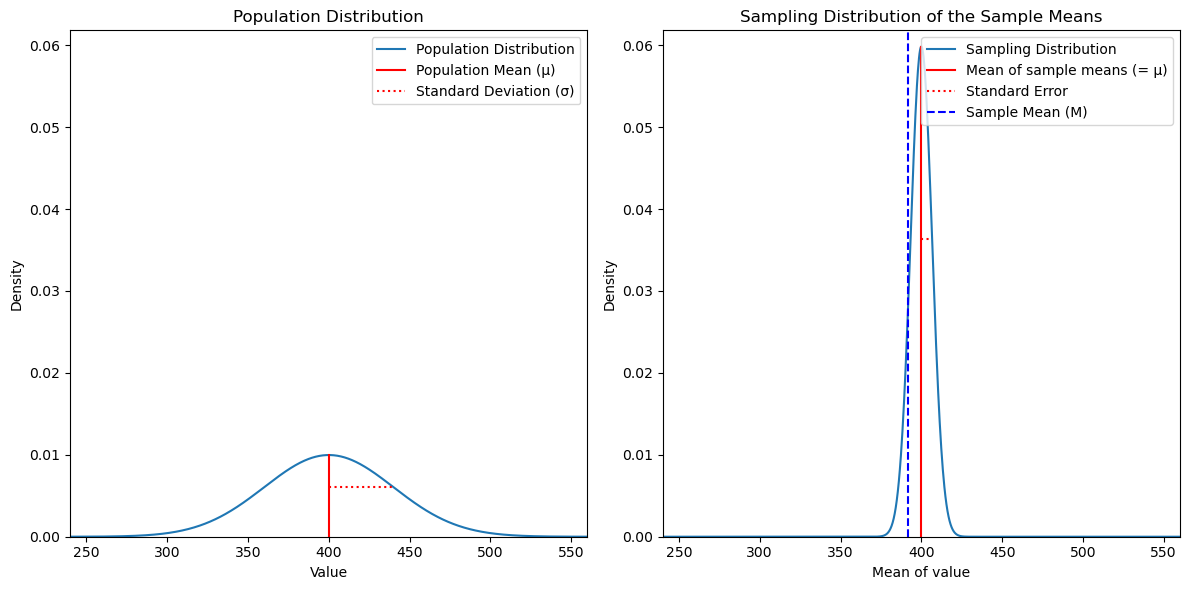

In [2]:
# Given values
mu = 400          # Population mean
sigma = 40        # Population standard deviation
sample_mean = 392 # Sample mean
n = 36            # Sample size
sample_std = sigma / np.sqrt(n)  # Standard error (std. deviation of sample means)

# Generate data for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
y_sample = norm.pdf(x, mu, sample_std)

# Define the plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Adjust xlim and ylim for both plots
xlims = (min(x), max(x))
ylims = (0, max(max(y), max(y_sample)) + 0.002)

# Plotting for Population Distribution
axes[0].plot(x, y, label='Population Distribution')
population_dist_height_at_mu = norm.pdf(mu, mu, sigma)
axes[0].plot([mu, mu], [0, population_dist_height_at_mu], 'red', label='Population Mean (μ)')
# Right half of the horizontal bar for σ at the height where it intersects the curve
y_val_pop_sigma = norm.pdf(mu + sigma, mu, sigma)
axes[0].hlines(y=y_val_pop_sigma, xmin=mu, xmax=mu+sigma, color='red', linestyle=':', label='Standard Deviation (σ)')
axes[0].set_title('Population Distribution')
axes[0].legend(loc='upper right')
axes[0].set_xlim(xlims)
axes[0].set_ylim(ylims)
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
    
# Plotting for Sampling Distribution of the Sample Means
axes[1].plot(x, y_sample, label='Sampling Distribution')
sampling_dist_height_at_mu = norm.pdf(mu, mu, sample_std)
axes[1].plot([mu, mu], [0, sampling_dist_height_at_mu], 'red', label='Mean of sample means (= μ)')
# Right half of the horizontal bar for standard error
y_val_sample_std = norm.pdf(mu + sample_std, mu, sample_std)
axes[1].hlines(y=y_val_sample_std, xmin=mu, xmax=mu+sample_std, linestyle=':', color='red', label='Standard Error')
axes[1].set_title('Sampling Distribution of the Sample Means')
plt.axvline(x=sample_mean, color='blue', linestyle='--', label='Sample Mean (M)')
axes[1].legend(loc='upper right')
axes[1].set_xlim(xlims)
axes[1].set_ylim(ylims)
axes[1].set_xlabel("Mean of value")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


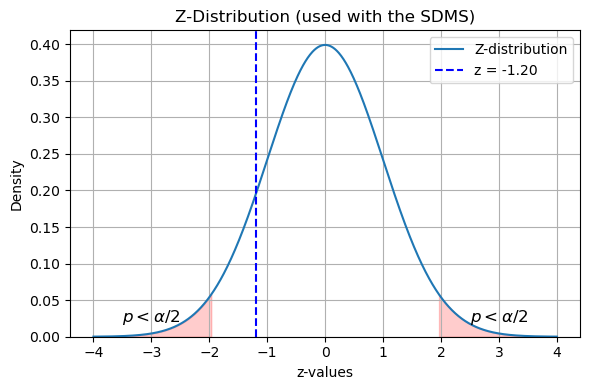

In [3]:
# Generate data for plotting
z = np.linspace(-4, 4, 1000)  # range of z-values
z_pdf = norm.pdf(z, 0, 1)  # standard normal distribution

# Critical z-values for two-tailed test with alpha = 0.05
z_critical_left = norm.ppf(0.025)  # -1.96
z_critical_right = -z_critical_left  # 1.96

plt.figure(figsize=(6, 4))

# Plot z-scores
plt.plot(z, z_pdf, label='Z-distribution')

# Fill areas below and above the critical values
plt.fill_between(z, z_pdf, where=(z < z_critical_left), color='red', alpha=0.2)
plt.fill_between(z, z_pdf, where=(z > z_critical_right), color='red', alpha=0.2)

# Add vertical line at z = -1.20
plt.axvline(x=-1.20, color='blue', linestyle='--', label='z = -1.20')

# Add texts for p < alpha and p > alpha
plt.text(-3, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')
plt.text(3, 0.02, r'$p < \alpha/2$', fontsize=12, ha='center', color='black')

# Labeling and titling
plt.title('Z-Distribution (used with the SDMS)')
plt.xlabel('z-values')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0)

plt.tight_layout()
plt.show()


#### Effect of increase of n in the hypothesis testing

If we get the same sample value for a big sample, the value that was common before becomes rare.

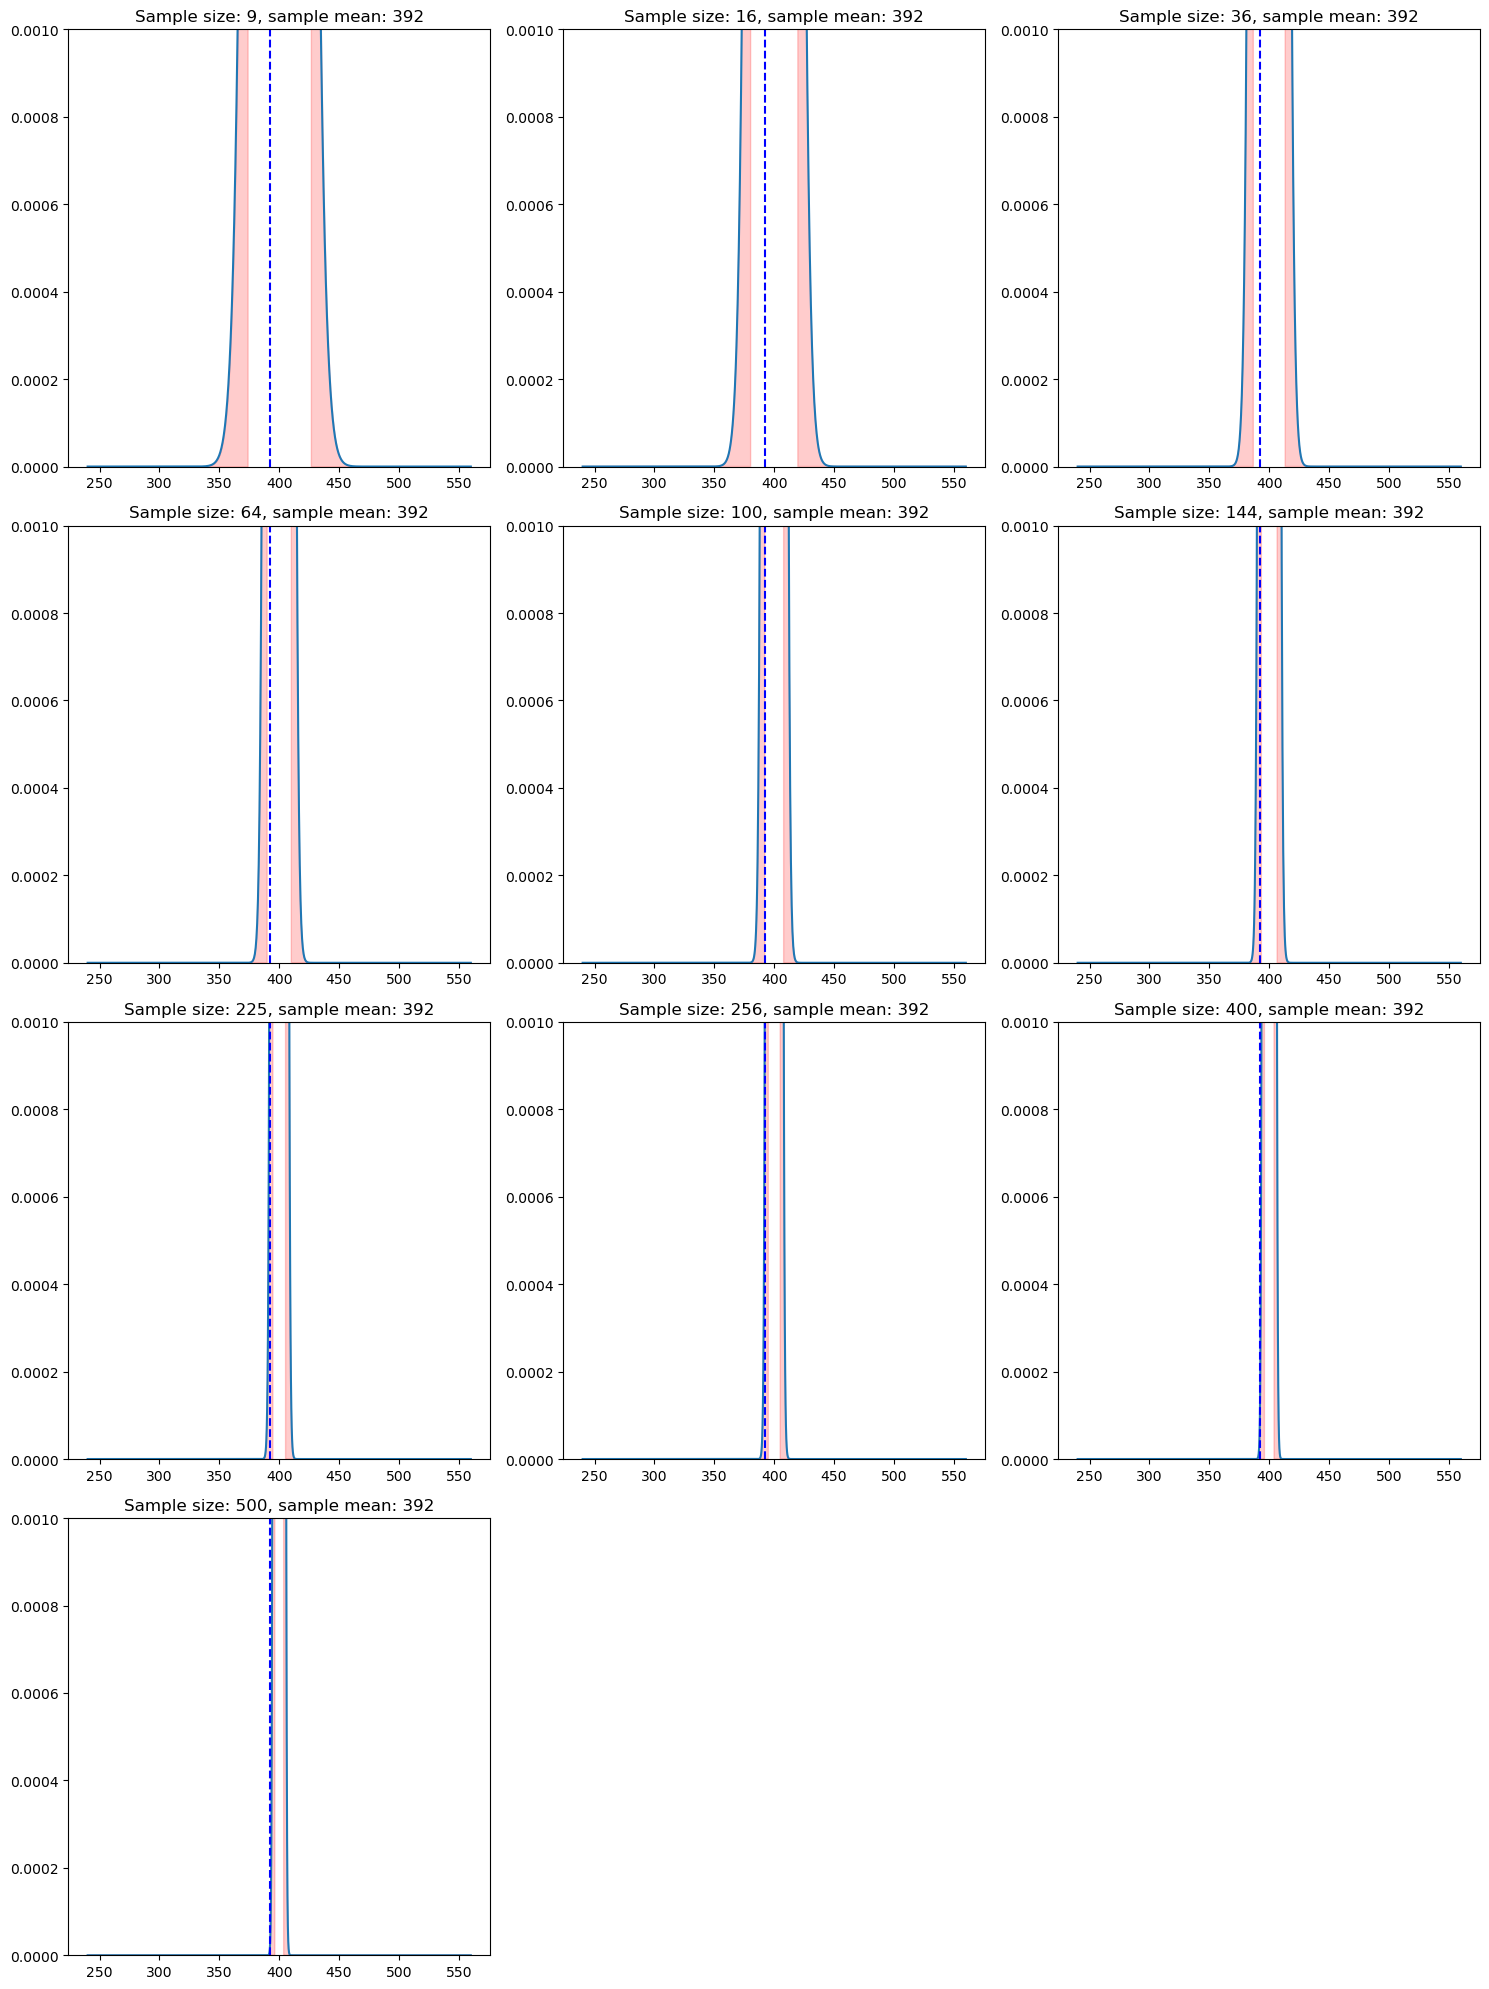

In [4]:
# Given values
mu = 400          # Population mean
sigma = 40        # Population standard deviation
sample_mean = 392 # Specific sample mean
sample_sizes = [9, 16, 36, 64, 100, 144, 225, 256, 400, 500]

# Determine number of rows needed
num_samples = len(sample_sizes)
num_rows = int(np.ceil(num_samples / 3))

# Generate data for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Pre-calculate xlim and ylim
max_density = 0
for n in sample_sizes:
    sample_std = sigma / np.sqrt(n)  
    y_sample = norm.pdf(x, mu, sample_std)
    max_density = max(max_density, max(y_sample))

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = np.array(axes).ravel()

for i, n in enumerate(sample_sizes):
    sample_std = sigma / np.sqrt(n)  
    y_sample = norm.pdf(x, mu, sample_std)
    
    # Critical values for 2.5% tails (two-tailed test)
    critical_value_lower = norm.ppf(0.025, mu, sample_std)
    critical_value_upper = norm.ppf(0.975, mu, sample_std)
    
    # Shaded regions
    mask_left = x < critical_value_lower
    mask_right = x > critical_value_upper
    
    axes[i].fill_between(x, y_sample, 0, where=mask_left, color='red', alpha=0.2)
    axes[i].fill_between(x, y_sample, 0, where=mask_right, color='red', alpha=0.2)
    
    # Plot the sampling distribution
    axes[i].plot(x, y_sample)
    
    # Vertical line for sample mean
    axes[i].axvline(x=sample_mean, color='blue', linestyle='--')
    
    # Setting xlim and ylim for the plot
    # axes[i].set_xlim(2*critical_value_lower - max(x), max(x))
    # axes[i].set_ylim(0, max_density + 0.002)
    axes[i].set_ylim(0, 0.001)
    axes[i].set_title(f'Sample size: {n}, sample mean: {sample_mean}')

# Remove unused subplots (if any)
for i in range(num_samples, num_rows*3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Type I and type 2 errors

- **Type I error**: our sample belongs to the original distribution ($ H_0 $) but we consider it belonging to a new distribution ($ H_1 $)
- **Type II error**: our sample belongs to a new distribution ($ H_1 $) but we consider it belonging to the original distribution ($ H_0 $)


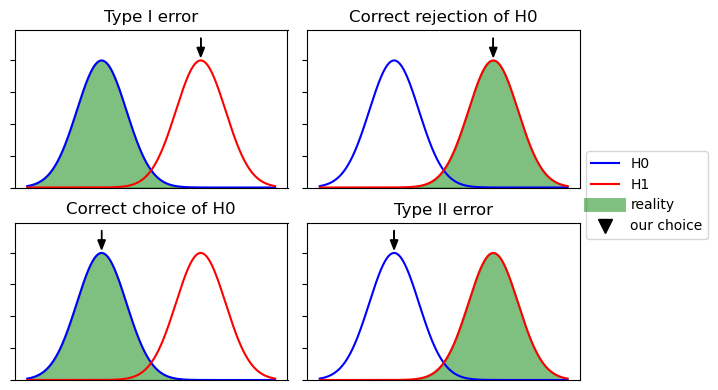

In [5]:
# Create the x-values and the Gaussian curves
x = np.linspace(-5, 5, 1000)
blue_y = norm.pdf(x, -2, 1)
red_y = norm.pdf(x, 2, 1)

fig, axes = plt.subplots(2, 2, figsize=(6, 4))

for row in range(2):
    for col in range(2):
        # Plot blue and red Gaussian curves with labels
        axes[row, col].plot(x, blue_y, color='blue', label="H0")
        axes[row, col].plot(x, red_y, color='red', label="H1")
        
        # Shading with label
        shade_label = "reality" if (row, col) not in [(0, 1), (1, 0)] else None  # Avoid redundant labels
        if col == 0: # First column: shade the blue curve
            axes[row, col].fill_between(x, blue_y, color='green', alpha=0.5, label=shade_label)
        else: # Second column: shade the red curve
            axes[row, col].fill_between(x, red_y, color='green', alpha=0.5, label=shade_label)
        
        # Set the y-tick labels and x-tick labels to empty
        axes[row, col].set_yticklabels([])
        axes[row, col].set_xticks([])

        # Arrow pointing down with label
        arrow_label = "choice" if (row, col) == (0, 0) else None  # Avoid redundant labels
        if row == 0:  # First row: Arrow pointing to the blue curve
            axes[row, col].arrow(2, 0.47, 0, -0.03, head_width=0.3, head_length=0.03, fc='k', ec='k', label=arrow_label)
        else:  # Second row: Arrow pointing to the red curve
            axes[row, col].arrow(-2, 0.47, 0, -0.03, head_width=0.3, head_length=0.03, fc='k', ec='k', label=arrow_label)
            
        axes[row, col].set_ylim(0)

# Creating a single legend for the entire figure

legend_elements = [Line2D([0], [0], color='blue', label='H0'),
                   Line2D([0], [0], color='red', label='H1'),
                   Line2D([0], [0], color='green', alpha=0.5, label='reality', linewidth=10),
                   Line2D([0], [0], color='black', marker='v', markersize=10, label='our choice', linestyle="None")]

fig.legend(handles=legend_elements, loc="center right", bbox_to_anchor=(1.2, 0.5))

                      # Title for the top-left plot
axes[0, 0].set_title("Type I error")
axes[0, 1].set_title("Correct rejection of H0")
axes[1, 0].set_title("Correct choice of H0")
axes[1, 1].set_title("Type II error")

plt.tight_layout()
plt.show()


## Effect Size: Cohen's $ d $ - [Population distributions]

Cohen's $ d $ is a standardized measure used to represent the size of an effect. Unlike p-values, which only tell us if an effect exists, Cohen's $ d $ provides information on the magnitude of the effect.

**Idea**: Since we rejected the null hypothesis, we consider that our sample comes from a new population. We don't know that is the true mean of the new population so **we assume that the sample mean is the mean of the new population** (the std of the original and new population should be the same). The cohen's d is how big was the shift between these two populations relative to the standard deviation. 

The formula to compute Cohen's $ d $ is given by:
$$ d = \frac{\mu_{\text{after}} - \mu_{\text{before}}}{s} $$

Where:
- $ \mu_{\text{after}} $ is the population mean after treatment.
- $ \mu_{\text{before}} $ is the population mean before treatment.
- $ s $ is the standard deviation of the population, typically calculated using the pre-treatment scores, but can also be a pooled standard deviation from both before and after scores if both are available.

But since the Central Limit Theorem says that for large sample sizes, the mean of the sampling distribution is the same as the population mean, if we rejected the null hypothesis, we consider that our sample mean is the mean of a new distribution of sampling means, which has the same mean of the new population, so we can substitute $ \mu_{\text{after}} $ by $ M $: 
$$ d = \frac{M - \mu}{\sigma} $$
Where:
- $ M $ is the sample mean
- $ \mu $ is the population mean
- $ \sigma $ is the population standard deviation

Given our values:
$$ M = 392 $$
$$ \mu = 400 $$
$$ \sigma = 40 $$

Substituting in the values, we find:
$$ d = \frac{392 - 400}{40} = -0.2$$

The magnitude and sign of $ d $ will indicate the size and direction of the effect, respectively. A larger absolute value of $ d $ suggests a bigger effect size. Typically, $ d=0.2 $ is considered a 'small' effect size, $ d=0.5 $ a 'medium' effect size, and $ d=0.8 $ a 'large' effect size.


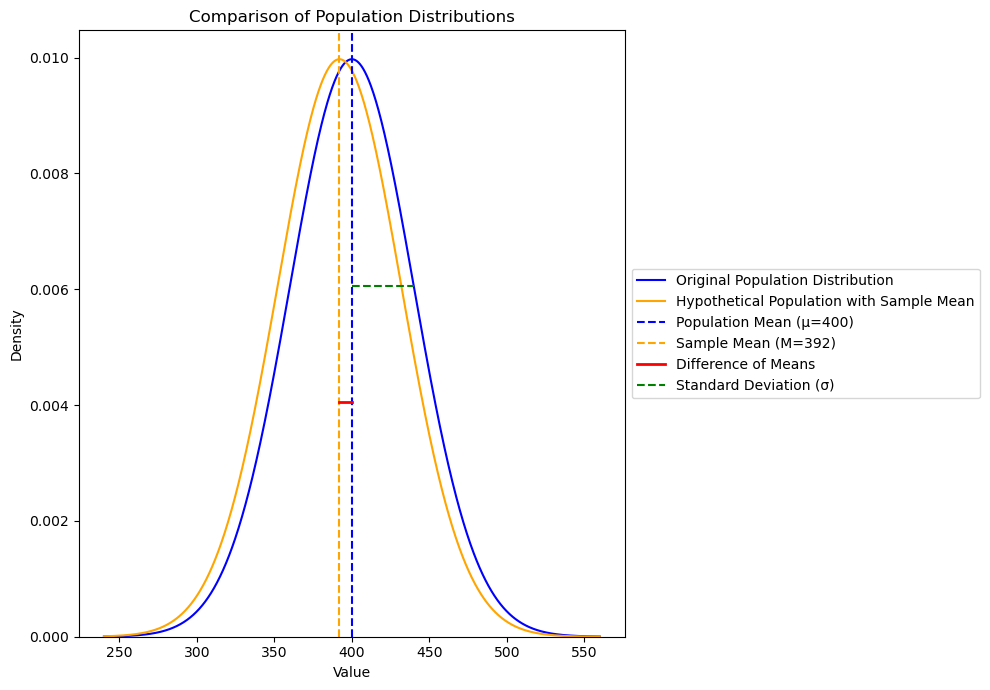

In [6]:
# Given values
mu = 400          # Original population mean
sigma = 40        # Population standard deviation
M = 392           # Sample mean

# Generate data for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_population = norm.pdf(x, mu, sigma)
y_sample_population = norm.pdf(x, M, sigma)

# Find the y-coordinate for the population mean (mu)
y_val_mu = norm.pdf(mu, mu, sigma)

# For the standard deviation line
y_val_sigma = norm.pdf(mu + sigma, mu, sigma)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(x, y_population, label='Original Population Distribution', color='blue')
plt.plot(x, y_sample_population, label='Hypothetical Population with Sample Mean', color='orange')
plt.axvline(x=mu, color='blue', linestyle='--', label=f'Population Mean (μ={mu})')
plt.axvline(x=M, color='orange', linestyle='--', label=f'Sample Mean (M={M})')
plt.plot([mu, M], [y_val_sigma - 0.002, y_val_sigma - 0.002], color='red', linestyle='-', linewidth=2, label='Difference of Means') # Horizontal line binding means
plt.hlines(y=y_val_sigma, xmin=mu, xmax=mu + sigma, color='green', linestyle='--', label='Standard Deviation (σ)')
plt.title('Comparison of Population Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.tight_layout()
plt.show()


# Effect Size: Statistical Power (or sensitivity) [SDMS distributions]

The probability of sampling a mean in $H_1$ at least as high as the $\alpha$ in $H_0$ <br> 

Formally, the statistical power of a test is the probability that we reject H0 when H1 is indeed true (i.e., the probability of avoiding a Type II error). In other words, it is the ability to detect an effect when in fact there is one. <br>

In practical terms, you assume that there will be an effect of certain size in your experiment (e.g. a shift to the right of 4.5 units) and you calculate the probability of getting samples in $H_1$ that are as big or bigger than $\alpha$ (or $\alpha/2$ in our example) in $H_0$. To calculate this probability, you need to calculate which is the corresponding value of $\alpha/2$ of $H_0$ in $H_1$. Then you divide all the $H_1$ area to the right of this value by the whole area (or you do it by consulting the Z-score curve).

In the case in our example, if you shift H1 left or if you increase the variability, you will decrease statistical power, because you will decrease the red shaded area.

Steps:
1. Determine the z (or t) value or the critical region of the SDMS distribution having H0 as reference
2. Determine the z (or t) value of this same point but now having H1 as reference
$$ z_{H1} = dist - z_{H0} $$
$$ z_{H1} = \mu_{H1} - (\mu_{H0} + z_{H0}) $$
**Remark: "dist" is NOT the same as Cohen's d because the latter is divided by the standard deviation**
3. Determine the probability of drawing a sample with mean equal or above $ z_{H1} $ having H1 as reference (red shaded area)

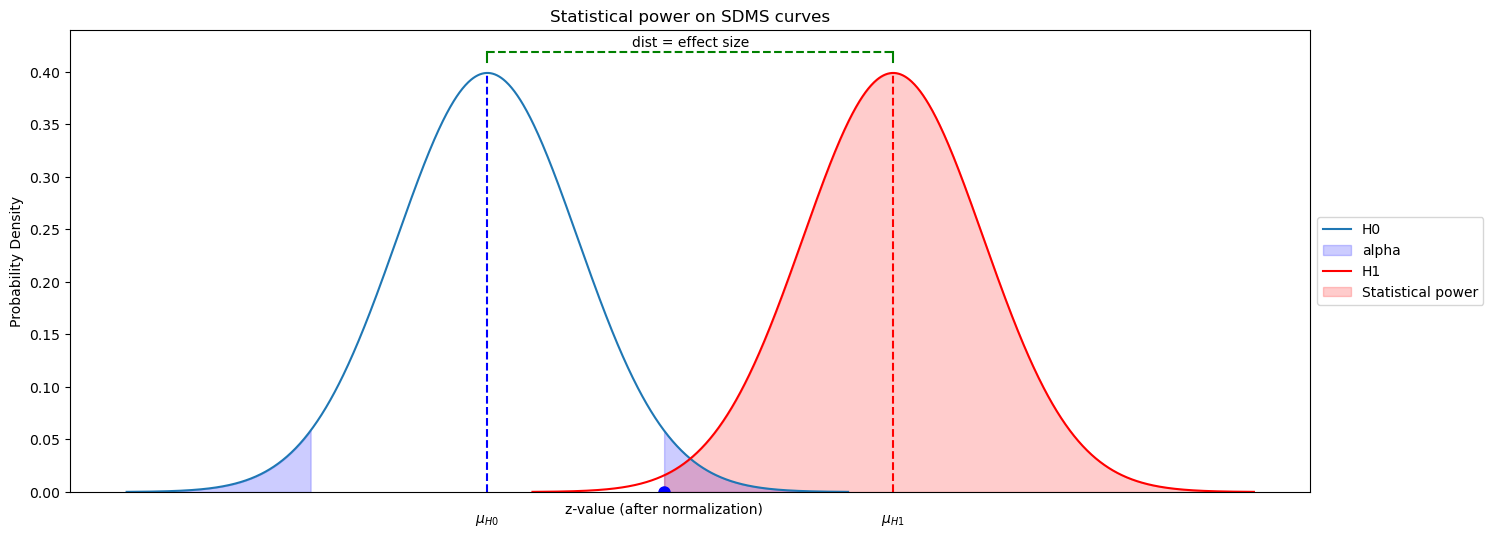

In [8]:
# Generate data for plotting
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Determine critical z-values for two-tailed test with alpha = 0.05
z_critical_left = norm.ppf(0.025)
z_critical_right = norm.ppf(1 - 0.025)

# Shading the regions for the original distribution
x_shaded_left = np.linspace(-4, z_critical_left, 1000)
x_shaded_right = np.linspace(z_critical_right, 4, 1000)
y_shaded_left = norm.pdf(x_shaded_left, 0, 1)
y_shaded_right = norm.pdf(x_shaded_right, 0, 1)

# Shading the region for the shifted distribution from z=2 onward on the left figure
x_shaded_custom = np.linspace(1.96, 8.5, 1000)
y_shaded_custom = norm.pdf(x_shaded_custom - 4.5, 0, 1)

fig, axes = plt.subplots(1, 1, figsize=(16, 6))

axes.plot(x, y, label='H0')
axes.fill_between(x_shaded_left, y_shaded_left, color='blue', alpha=0.2, label='alpha')
axes.fill_between(x_shaded_right, y_shaded_right, color='blue', alpha=0.2)
axes.plot(x + 4.5, y, label='H1', color='red')
axes.fill_between(x_shaded_custom, y_shaded_custom, color='red', alpha=0.2, label='Statistical power')
axes.set_title('Statistical power on SDMS curves')
axes.set_ylabel('Probability Density')

# Vertical lines for the means of each curve
y_peak = max(y)
axes.plot([0, 0], [0, y_peak], color='blue', linestyle='--')
axes.plot([4.5, 4.5], [0, y_peak], color='red', linestyle='--')

# Labels for the vertical lines
axes.text(0, -0.02, r'$\mu_{H0}$', ha='center', va='top')
axes.text(4.5, -0.02, r'$\mu_{H1}$', ha='center', va='top')

# Drawing a horizontal line connecting the peaks of both curves
y_horizontal = y_peak * 1.05
axes.hlines(y_horizontal, 0, 4.5, colors='green', linestyles='--')

# Adding smaller ticks at the ends of the horizontal line
tick_length = 0.01
axes.plot([0, 0], [y_horizontal - tick_length, y_horizontal], color='green')
axes.plot([4.5, 4.5], [y_horizontal - tick_length, y_horizontal], color='green')

# Annotating the horizontal line
axes.annotate('dist = effect size', xy=(2.25, y_horizontal), xytext=(2.25, y_horizontal + 0.005), ha='center')

# Plotting dot and z-value
dot_x = z_critical_right
dot_y = 0  # Directly on top of x-axis
axes.plot(dot_x, dot_y, 'bo', markersize=8)
axes.annotate('z-value (after normalization)', (dot_x, dot_y), textcoords="offset points", xytext=(0,-15), ha='center')

# Turning off x-axis ticks
axes.set_xticks([])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.grid(False)
axes.set_ylim(0)
plt.show()